In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import (Voronoi, voronoi_plot_2d, Delaunay)
from pebi_gmsh.constraints_2D.site_locations import create_site_locations
from pebi_gmsh.generate_constrained_mesh import generate_constrained_mesh_2d
from pebi_gmsh.constraints_2D.site_data import (FConstraint, CConstraint)

np.random.seed(1948)

def get_radius_from_voronoi(voronoi):
    radii = np.zeros((voronoi.points.shape[0]+1,1))
    for i, region in enumerate(voronoi.point_region):
        if not region == -1:
            region_verts = voronoi.regions[region]
            for vert in region_verts:
                if not vert == -1:
                    radii[vert] = np.linalg.norm(voronoi.points[i] - voronoi.vertices[vert])
    return radii

No handles with labels found to put in legend.
C:\Users\sondr\AppData\Local\Temp\ipykernel_29352\2319187834.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edge_color" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("pebi_construction_1.png", bbox_inches='tight', pad_inches=0, edge_color="b")


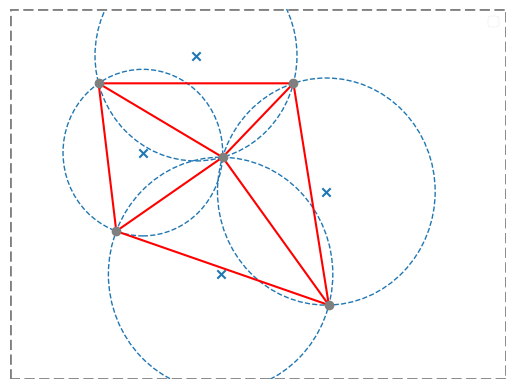

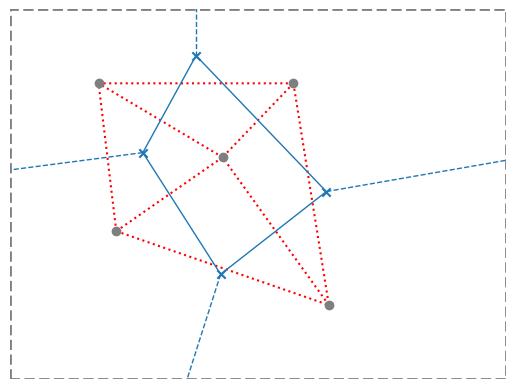

In [19]:
# Voronoi demonstration
fig, ax_0 = plt.subplots(linewidth=2)
points = np.array([
    [0.05, 0.8],
    [0.4, 0.6],
    [0.7, 0.2],
    [0.1, 0.4],
    [0.6, 0.8]])
tris = Delaunay(points)
voronoi = Voronoi(points)
centroids = voronoi.vertices
radii = np.linalg.norm(centroids -  points[tris.simplices[:,0]], axis=1)
ax_0.triplot(points[:,0], points[:,1], tris.simplices, c="r")
for centroid, radius in zip(centroids, radii):
    circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    ax_0.add_patch(circle)
ax_0.scatter(centroids[:,0], centroids[:,1], marker="x", color="C0")
ax_0.scatter(points[:,0], points[:,1],c="C7", zorder=10)

ax_0.axis('off')
ax_0.set_ylim(0,1)
ax_0.set_xlim(-.2,1.2)
lg = plt.legend()
fr = lg.get_frame()
fr.set_lw(0.2)
border_lol = np.array([[-.2,0],[-.2,1],[1.2,1],[1.2,0],[-.2,0]])
plt.plot(border_lol[:,0], border_lol[:,1], c="gray", linewidth=2, linestyle="--")
plt.savefig("pebi_construction_1.png", bbox_inches='tight', pad_inches=0, edge_color="b")

fig, ax_1 = plt.subplots()
voronoi_plot_2d(voronoi,ax_1,show_points = False, show_vertices = False, line_colors="C0")
ax_1.scatter(centroids[:,0], centroids[:,1], marker="x", color="C0")
ax_1.scatter(points[:,0], points[:,1],c="C7", zorder=10)
ax_1.triplot(points[:,0], points[:,1], tris.simplices, linestyle=":", c="r")

ax_1.set_ylim(0,1)
ax_1.set_xlim(-.2,1.2)
ax_1.axis('off')
plt.plot(border_lol[:,0], border_lol[:,1], c="gray", linewidth=2, linestyle="--")
plt.savefig("pebi_construction_2.png", bbox_inches='tight', pad_inches=0)



No handles with labels found to put in legend.


[[1 4 3]
 [2 1 3]
 [4 1 0]]


C:\Users\sondr\AppData\Local\Temp\ipykernel_22564\826203752.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edge_color" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("multi_circumcirle.png", bbox_inches='tight', pad_inches=0, edge_color="b")


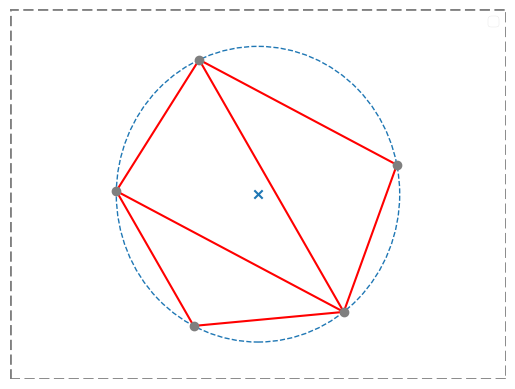

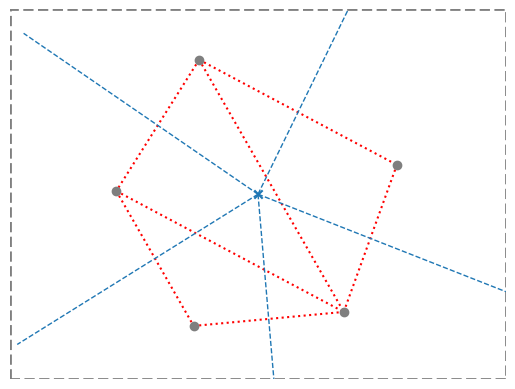

In [3]:
# Voronoi demonstration
fig, ax_0 = plt.subplots(linewidth=2)

r = 0.5
angles = np.linspace(np.pi/2-0.2, 1.8*np.pi + 0.2, 5, endpoint=True)

points = 0.4*np.c_[np.sin(angles), np.cos(angles)] + 0.5
tris = Delaunay(points)
voronoi = Voronoi(points)
centroids = voronoi.vertices
radii = np.linalg.norm(centroids -  points[tris.simplices[:,0]], axis=1)
ax_0.triplot(points[:,0], points[:,1], tris.simplices, c="r")
print(tris.simplices)
# ax_0.triplot(points[:,0], points[:,1],[[0,1,2], [0,2,4], [2,3,4]] , c="k", linestyle="--", zorder=-5)


for centroid, radius in zip(centroids, radii):
    circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    ax_0.add_patch(circle)
ax_0.scatter(centroids[:,0], centroids[:,1], marker="x", color="C0")
ax_0.scatter(points[:,0], points[:,1],c="C7", zorder=10)

ax_0.axis('off')
ax_0.set_ylim(0,1)
ax_0.set_xlim(-.2,1.2)
lg = plt.legend()
fr = lg.get_frame()
fr.set_lw(0.2)
border_lol = np.array([[-.2,0],[-.2,1],[1.2,1],[1.2,0],[-.2,0]])
plt.plot(border_lol[:,0], border_lol[:,1], c="gray", linewidth=2, linestyle="--")
plt.savefig("multi_circumcirle.png", bbox_inches='tight', pad_inches=0, edge_color="b")


fig, ax_1 = plt.subplots()
voronoi_plot_2d(voronoi,ax_1,show_points = False, show_vertices = False, line_colors="C0")
ax_1.scatter(centroids[:,0], centroids[:,1], marker="x", color="C0")
ax_1.scatter(points[:,0], points[:,1],c="C7", zorder=10)
ax_1.triplot(points[:,0], points[:,1], tris.simplices, linestyle=":", c="r")

ax_1.set_ylim(0,1)
ax_1.set_xlim(-.2,1.2)
ax_1.axis('off')
plt.plot(border_lol[:,0], border_lol[:,1], c="gray", linewidth=2, linestyle="--")
plt.savefig("multi_voronoi.png", bbox_inches='tight', pad_inches=0)

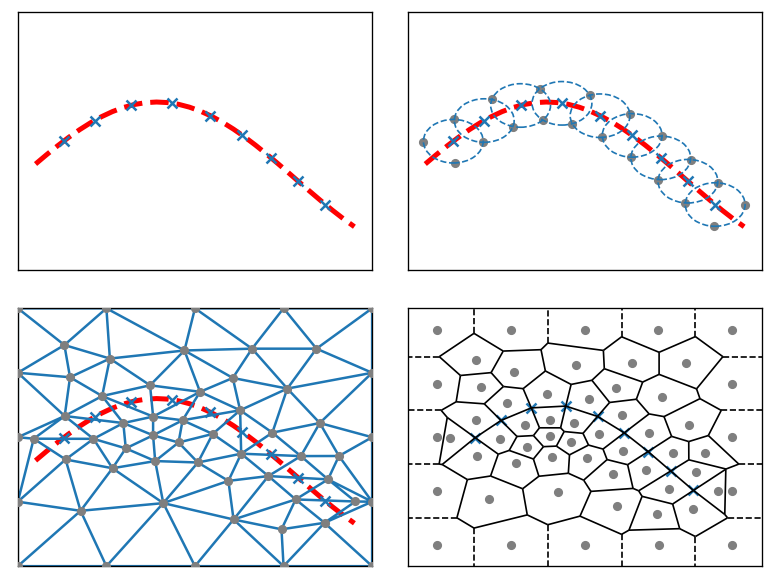

In [20]:

# Face constraint test


x = np.linspace(0.05,0.95,30)
y = 0.3*np.sin(4*x) + 0.35
f_constraint = FConstraint(np.c_[x,y], 0.12)



site_data = create_site_locations(f_constraints=[f_constraint])
sites = site_data.sites



mesh = generate_constrained_mesh_2d(site_data, h0=0.3)

fig, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2, figsize=(8, 6), dpi=120)

tris = Delaunay(mesh["node_coords"].reshape((-1,3))[:,:2])
voronoi = Voronoi(sites)
centroids = voronoi.vertices
radii = get_radius_from_voronoi(voronoi)#np.linalg.norm(centroids -  sites[tris.simplices[5:,0]], axis=1)
# ax.triplot(points[:,0], points[:,1], tris.simplices, c="r")
circles = list(zip(centroids, radii))
circles.sort(key = lambda x: x[1])

ax0.plot(x,y, "r--", zorder=-10, linewidth=3)
ax1.plot(x,y, "r--", zorder=-10, linewidth=3)
ax2.plot(x,y, "r--", zorder=-10, linewidth=3)
# ax3.plot(x,y, "r--", zorder=-10, linewidth=3)


for centroid, radius in circles[:9]:
    ax0.scatter(centroid[0], centroid[1], c="C0", marker="x")
    ax1.scatter(centroid[0], centroid[1], c="C0", marker="x")
    ax2.scatter(centroid[0], centroid[1], c="C0", marker="x")
    ax3.scatter(centroid[0], centroid[1], c="C0", marker="x")

    circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    ax1.add_patch(circle)
    # circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    # ax2.add_patch(circle)
    # circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    # ax3.add_patch(circle)



ax0.set_ylim((0,1))
ax0.set_xlim((0,1))
ax1.set_ylim((0,1))
ax1.set_xlim((0,1))
ax2.set_ylim((0,1))
ax2.set_xlim((0,1))
ax3.set_ylim((0,1))
ax3.set_xlim((0,1))

ax0.set_yticks([])
ax0.set_xticks([])
ax1.set_yticks([])
ax1.set_xticks([])
ax2.set_yticks([])
ax2.set_xticks([])
ax3.set_yticks([])
ax3.set_xticks([])

ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticklabels([])

plt.subplots_adjust(wspace=.1, hspace=.15)

ax1.scatter(sites[:,0], sites[:,1], c="C7", s=20)
# ax3.scatter(sites[:,0], sites[:,1], c="C7")


# ax0.axis('off')
# ax1.axis('off')
# ax2.axis('off')

# ax3.axis('off')
points = mesh["node_coords"].reshape((-1,3))[:,:2]
ax2.scatter(points[:,0], points[:,1], c="C7", zorder=10, s=20)
ax3.scatter(points[:,0], points[:,1], c="C7", zorder=10, s=20)

voronoi = Voronoi(points)
ax2.triplot(points[:,0], points[:,1], tris.simplices, zorder=-2)
# voronoi_plot_2d(voronoi, ax=ax2, show_points=True, show_vertices=False)
voronoi_plot_2d(voronoi, ax=ax3, show_points=False, show_vertices=False)


# Save just the portion _inside_ the second axis's boundaries
extent = ax0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('f_constraint_0.png', bbox_inches=extent.expanded(1.1, 1.1))
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('f_constraint_1.png', bbox_inches=extent.expanded(1.1, 1.1))
extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('f_constraint_2.png', bbox_inches=extent.expanded(1.1, 1.1))
extent = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('f_constraint_3.png', bbox_inches=extent.expanded(1.1, 1.1))
# Pad the saved area by 10% in the x-direction and 20% in the y-directi

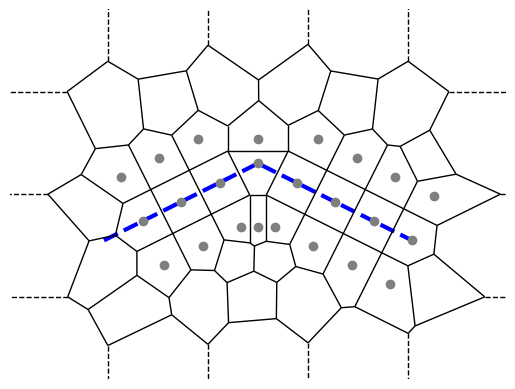

In [7]:
# Cell constraint test

# x = np.linspace(0.05,0.95,30)
# y = 0.3*np.sin(4*x) + 0.35
x = np.array([0,0.5, 1])
y = np.array([0.35, 0.6, 0.35])
c_constraint = CConstraint(np.c_[x,y], 0.15, protection_sites=1)



site_data = create_site_locations(c_constraints=[c_constraint])
sites = site_data.sites

bounding_box = np.array([[-.15, 0], [1.15, 1]])

mesh = generate_constrained_mesh_2d(site_data, h0=0.4, bounding_polygon=bounding_box)

fig, ax = plt.subplots()


ax.plot(x,y, "b--", zorder=-10, linewidth=3)
ax.set_ylim((0,1))
ax.set_xlim((0,1))

ax.scatter(sites[:,0], sites[:,1], marker="o",c="C7")
ax.axis('off')
ax.axis('equal')
voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

plt.savefig("cell_constraint.png", bbox_inches='tight', pad_inches=0, dpi=900)

[[0.73809929 0.86371053]
 [0.28306592 0.50356306]
 [0.20470132 0.25236513]
 [0.52870097 0.40977806]
 [0.21538419 0.16565093]
 [0.89119588 0.5046479 ]
 [0.15984368 0.81859866]
 [0.35051798 0.80279935]
 [0.42766104 0.74943582]]


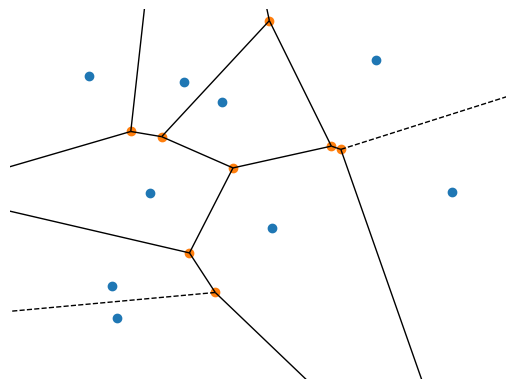

In [9]:
sites = np.array([
[0.73809929, 0.86371053],
[0.28306592, 0.50356306],
[0.20470132, 0.25236513],
[0.52870097, 0.40977806],
[0.21538419, 0.16565093],
[0.89119588, 0.5046479 ],
[0.15984368, 0.81859866],
[0.35051798, 0.80279935],
[0.42766104, 0.74943582]])

print(sites)
voronoi = Voronoi(sites)
fig, ax = plt.subplots()
ax.set_axis_off()

ax.axis('off')

ax.scatter(sites[:,0], sites[:,1], c="C0")
ax.scatter(voronoi.vertices[:,0], voronoi.vertices[:,1], c="C1")

voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.set_ylim((0,1))
ax.set_xlim((0,1))
plt.savefig("PEBI.png", bbox_inches='tight', pad_inches=0, dpi=900)

[[-0.1  0.5]
 [ 1.1  0.5]]
[[0.79389263 0.9045085 ]
 [0.20610737 0.0954915 ]]


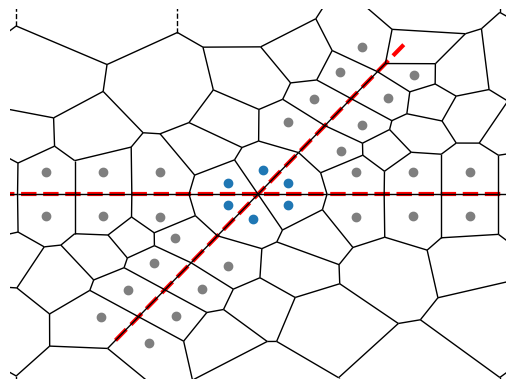

In [ ]:
fig, ax = plt.subplots()

angle = np.pi*0.2

x = np.array([-0.1,1.1])
y = center = np.array([0.5, 0.5])

line_1 = np.c_[x,y]

dir = np.array([np.sin(angle), np.cos(angle)])*0.5

line_2 = np.vstack([center + dir, center-dir])
print(line_1)
print(line_2)
f_constraint_0 = FConstraint(line_1, 0.12)
f_constraint_1 = FConstraint(line_2, 0.12)


site_data = create_site_locations(f_constraints=[f_constraint_0, f_constraint_1])
sites = site_data.sites


center_sites = np.nonzero(np.linalg.norm(sites - np.array([0.5,0.5]), axis=1) < 0.1)
outer_sites = np.nonzero(np.linalg.norm(sites - np.array([0.5,0.5]), axis=1) > 0.1)


ax.scatter(sites[center_sites,0], sites[center_sites,1], marker="o",c="C10")
ax.scatter(sites[outer_sites,0], sites[outer_sites,1], marker="o",c="C7")
mesh = generate_constrained_mesh_2d(site_data, h0=0.4, bounding_polygon=bounding_box, popup=True)


voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
ax.set_axis_off()

ax.plot(x,y, "r--", zorder=-10, linewidth=3)
ax.plot(line_2[:,0],line_2[:,1], "r--", zorder=-10, linewidth=3)

ax.axis('off')

voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.set_ylim((0,1))
ax.set_xlim((0,1))
plt.savefig("FF_intersection_45.png", bbox_inches='tight', pad_inches=0)


[[0.05       0.3975    ]
 [0.09736842 0.43788781]
 [0.14473684 0.47378809]
 [0.19210526 0.50520083]
 [0.23947368 0.53212604]
 [0.28684211 0.55456371]
 [0.33421053 0.57251385]
 [0.38157895 0.58597645]
 [0.42894737 0.59495152]
 [0.47631579 0.59943906]
 [0.52368421 0.59943906]
 [0.57105263 0.59495152]
 [0.61842105 0.58597645]
 [0.66578947 0.57251385]
 [0.71315789 0.55456371]
 [0.76052632 0.53212604]
 [0.80789474 0.50520083]
 [0.85526316 0.47378809]
 [0.90263158 0.43788781]
 [0.95       0.3975    ]]


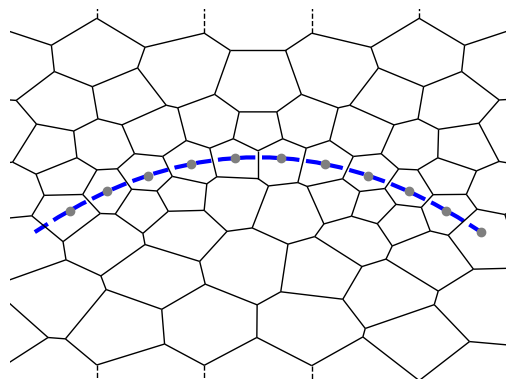

In [21]:
fig, ax = plt.subplots()
bounding_box = np.array([[-.15, 0], [1.15, 1]])
angle = np.pi*0.2

x = np.linspace(0.05,0.95,20)
y =0.6 - (x-0.5)**2

line_1 = np.c_[x,y]

dir = np.array([np.sin(angle), np.cos(angle)])*0.5

# line_2 = np.vstack([center + dir, center-dir])
print(line_1)
# print(line_2)
c_constraint_0 = CConstraint(line_1, 0.1)
# c_constraint_1 = CConstraint(line_2, 0.12)


site_data = create_site_locations(c_constraints=[c_constraint_0])
sites = site_data.sites

ax.scatter(sites[:,0], sites[:,1], marker="o",c="C7")
mesh = generate_constrained_mesh_2d(site_data, h0=0.25, bounding_polygon=bounding_box, popup=True)


voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
ax.set_axis_off()

ax.plot(x,y, "b--", zorder=-10, linewidth=3)


ax.axis('off')

voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.set_ylim((0,1))
ax.set_xlim((0,1))
plt.savefig("CConstraint.png", bbox_inches='tight', pad_inches=0, dpi=600)


[[-0.16  0.5 ]
 [ 1.16  0.5 ]]
[[ 1.12370457  0.81779335]
 [-0.12370457  0.18220665]]


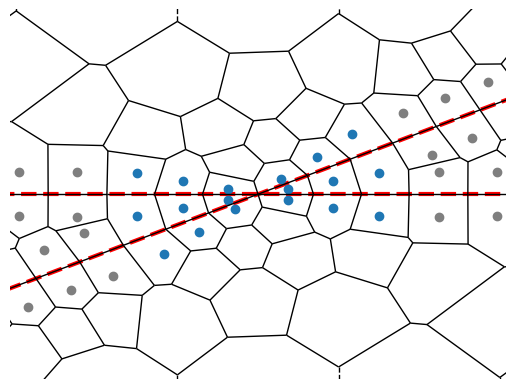

In [ ]:
fig, ax = plt.subplots()

angle = np.pi*0.35

x = np.array([-0.16,1.16])
y = center = np.array([0.5, 0.5])

line_1 = np.c_[x,y]

dir = np.array([np.sin(angle), np.cos(angle)])*0.7

line_2 = np.vstack([center + dir, center-dir])
print(line_1)
print(line_2)
f_constraint_0 = FConstraint(line_1, 0.12)
f_constraint_1 = FConstraint(line_2, 0.12)


site_data = create_site_locations(f_constraints=[f_constraint_0, f_constraint_1])
sites = site_data.sites


center_sites = np.nonzero(np.linalg.norm(sites - np.array([0.5,0.5]), axis=1) < 0.3)
outer_sites = np.nonzero(np.linalg.norm(sites - np.array([0.5,0.5]), axis=1) > 0.3)


ax.scatter(sites[center_sites,0], sites[center_sites,1], marker="o",c="C10")
ax.scatter(sites[outer_sites,0], sites[outer_sites,1], marker="o",c="C7")
mesh = generate_constrained_mesh_2d(site_data, h0=0.4, bounding_polygon=bounding_box, popup=True)


voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
ax.set_axis_off()

ax.plot(x,y, "r--", zorder=-10, linewidth=3)
ax.plot(line_2[:,0],line_2[:,1], "r--", zorder=-10, linewidth=3)

ax.axis('off')

voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.set_ylim((0,1))
ax.set_xlim((0,1))
plt.savefig("FF_intersection_30.png", bbox_inches='tight', pad_inches=0)


NameError: name 'bounding_box' is not defined

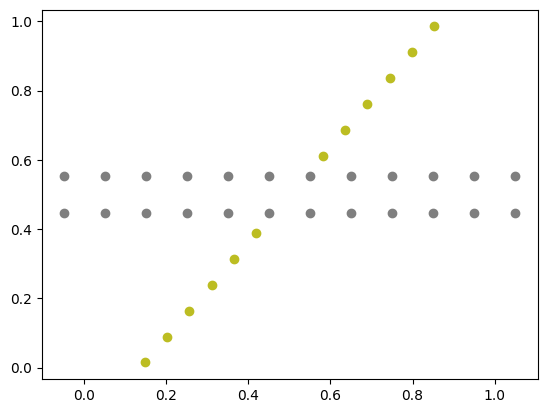

In [4]:
fig, ax = plt.subplots()

angle = np.pi*0.2

x = np.array([-0.1,1.1])
y = center = np.array([0.5, 0.5])

line_f = np.c_[x,y]

dir = np.array([np.sin(angle), np.cos(angle)])*0.6

line_c = np.vstack([center + dir, center-dir])
f_constraint_0 = FConstraint(line_f, 0.105)
# f_constraint_1 = FConstraint(line_2, 0.12)

lens = np.linspace(0,1,14)
lens = np.r_[lens[:6], lens[8:]].reshape((-1,1))

c_sites = line_c[0]*(1-lens) + line_c[1]*lens

site_data = create_site_locations(f_constraints=[f_constraint_0])
sites = site_data.sites

ax.scatter(sites[:,0], sites[:,1], marker="o",c="C7")
ax.scatter(c_sites[:,0], c_sites[:,1], marker="o",c="C8")

indixes = site_data.add_sites(c_sites)
site_data.add_edges(np.c_[indixes[:5], indixes[1:6]])
site_data.add_edges(np.c_[indixes[6:-1], indixes[7:]])

mesh = generate_constrained_mesh_2d(site_data, h0=0.2, bounding_polygon=bounding_box, popup=True)


voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
ax.set_axis_off()

ax.plot(x,y, "r--", zorder=-10, linewidth=3)
ax.plot(line_c[:,0],line_c[:,1], "b--", zorder=-10, linewidth=3)

ax.axis('off')

voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.set_ylim((0,1))
ax.set_xlim((0,1))
plt.savefig("face_focus.png", bbox_inches='tight', pad_inches=0)


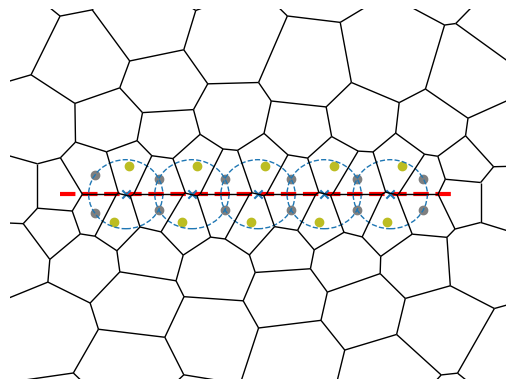

In [14]:

bounding_box = np.array([[-.15, 0], [1.15, 1]])
fig, ax = plt.subplots()


x = np.array([0.1,0.9])
y = center = np.array([0.5, 0.5])

line_f = np.c_[x,y]

num= 5

f_constraint_0 = FConstraint(line_f, 0.15, 0.45)
# f_constraint_1 = FConstraint(line_2, 0.12)

lens = np.linspace(0.225,0.775,num)
c_sites = np.r_[np.c_[lens-0.015, np.zeros(num) + 0.44], np.c_[lens+0.015, np.zeros(num) + 0.56]]



site_data = create_site_locations(f_constraints=[f_constraint_0])
sites = site_data.sites
test_voronoi = Voronoi(sites)
ax.scatter(sites[:,0], sites[:,1], marker="o",c="C7")
ax.scatter(c_sites[:,0], c_sites[:,1], marker="o",c="C8")
indixes = site_data.add_sites(c_sites)

site_data.add_edges(np.c_[indixes[:num-1], indixes[1:num]])
site_data.add_edges(np.c_[indixes[num:-1], indixes[num+1:]])

mesh = generate_constrained_mesh_2d(site_data, h0=0.3, bounding_polygon=bounding_box, popup=True)


voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
ax.set_axis_off()

ax.plot(x,y, "r--", zorder=-10, linewidth=3)


centroids = test_voronoi.vertices
radii = get_radius_from_voronoi(test_voronoi)
circles = list(zip(centroids, radii))
circles.sort(key = lambda x: x[1])
for centroid, radius in circles[:5]:
    ax.scatter(centroid[0], centroid[1], c="C0", marker="x")

    circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    ax.add_patch(circle)
voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.axis('off')
ax.set_ylim((0.1,0.9))
ax.set_xlim((0,1))
plt.savefig("F_Broken.png", bbox_inches='tight', pad_inches=0)


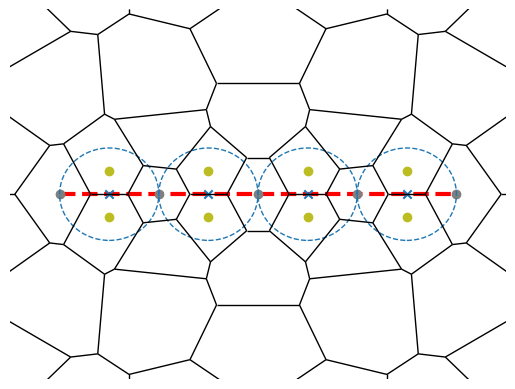

In [49]:
from pebi_gmsh.site_data import SiteData
bounding_box = np.array([[-.15, 0], [1.15, 1]])
fig, ax = plt.subplots()


x = np.linspace(0.1,0.9, 5)
y = np.ones(5)*0.5

orig_sites = np.c_[x,y]

num= 4

lens = np.linspace(0.2,0.8,num)
c_sites = np.r_[np.c_[lens, np.zeros(num) + 0.45], np.c_[lens, np.zeros(num) + 0.55]]
site_data = SiteData([],[])
idx = site_data.add_sites(orig_sites)
site_data.add_edges(np.array([idx[1:], idx[:-1]]).T)
ax.scatter(orig_sites[:,0], orig_sites[:,1], marker="o",c="C7")
ax.scatter(c_sites[:,0], c_sites[:,1], marker="o",c="C8")

indixes = site_data.add_sites(c_sites)

site_data.add_edges(np.c_[indixes[:num-1], indixes[1:num]])
site_data.add_edges(np.c_[indixes[num:-1], indixes[num+1:]])

mesh = generate_constrained_mesh_2d(site_data, h0=0.3, bounding_polygon=bounding_box, popup=True)


voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
ax.set_axis_off()

ax.plot(x,y, "r--", zorder=-10, linewidth=3)


centroids = test_voronoi.vertices
radii = get_radius_from_voronoi(test_voronoi)
circles = list(zip(np.c_[lens, np.ones(num)*0.5], np.ones(num)*0.1))
circles.sort(key = lambda x: x[1])
for centroid, radius in circles[:8]:
    ax.scatter(centroid[0], centroid[1], c="C0", marker="x")

    circle = plt.Circle(centroid,radius, fill=False, linestyle="--", color="C0")
    ax.add_patch(circle)
voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.axis('off')
ax.set_ylim((0.1,0.9))
ax.set_xlim((0,1))
plt.savefig("C_Broken.png", bbox_inches='tight', pad_inches=0, dpi=600)


NameError: name 'line_1' is not defined

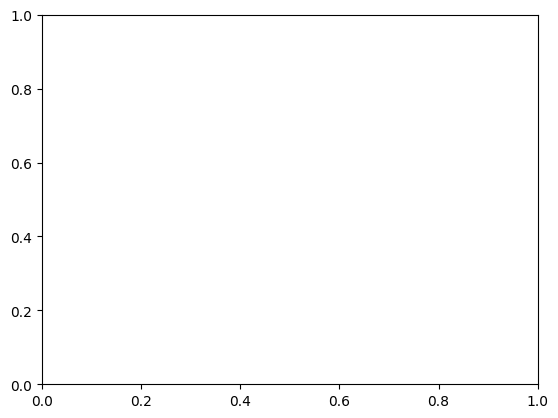

In [18]:
from pebi_gmsh.site_data import SiteData

fig, ax = plt.subplots()

angle = np.pi*0.2

x = np.array([-0.1,1.1])
y = center = np.array([0.5, 0.5])

line_f = np.c_[x,y]

dir = np.array([np.sin(angle), np.cos(angle)])*0.6

line_c = np.vstack([center + dir, center-dir])
print(line_1)
print(line_2)
f_constraint_0 = FConstraint(line_f, 0.105)
# f_constraint_1 = FConstraint(line_2, 0.12)

lens = np.linspace(0,1,14).reshape((-1,1))

c_sites = line_c[0]*(1-lens) + line_c[1]*lens

site_data = create_site_locations(f_constraints=[f_constraint_0])
sites = site_data.sites

site_data_2 = SiteData([],[])
idx_0 = site_data_2.add_sites(sites[:5])
idx_1 = site_data_2.add_sites(sites[7:12])
idx_2 = site_data_2.add_sites(sites[12:17])
idx_3 = site_data_2.add_sites(sites[19:])
print("Sitenum: {}".format(site_data_2.sites.shape[0]))

sites = site_data_2.sites
site_data_2.add_edges(np.c_[idx_0,idx_2])
site_data_2.add_edges(np.c_[idx_1,idx_3])

site_data_2.add_edges(np.c_[idx_0[1:],idx_2[:-1]])
site_data_2.add_edges(np.c_[idx_1[1:],idx_3[:-1]])

site_data_2.add_edges(np.c_[idx_0[1:],idx_0[:-1]])
site_data_2.add_edges(np.c_[idx_1[1:],idx_1[:-1]])
site_data_2.add_edges(np.c_[idx_2[1:],idx_2[:-1]])
site_data_2.add_edges(np.c_[idx_3[1:],idx_3[:-1]])
idx_4 = site_data_2.add_sites(c_sites)
site_data_2.add_edges(np.c_[idx_4[1:],idx_4[:-1]])
site_data_2.add_edges(np.array([
    [idx_2[-1], idx_4[6]],
    [idx_3[0], idx_4[6]],
    [idx_0[-1], idx_4[7]],
    [idx_1[0], idx_4[7]],
    [idx_2[-1], idx_4[7]],
    [idx_1[0], idx_4[6]],


]))


ax.scatter(sites[:,0], sites[:,1], marker="o",c="C7")
ax.scatter(c_sites[:,0], c_sites[:,1], marker="o",c="C8")

indixes = site_data.add_sites(c_sites[:])
site_data.add_edges(np.c_[indixes[:5], indixes[1:6]])
site_data.add_edges(np.c_[indixes[6:-1], indixes[7:]])

mesh = generate_constrained_mesh_2d(site_data_2, h0=0.2, bounding_polygon=bounding_box, popup=True)


voronoi = Voronoi(mesh["node_coords"].reshape((-1,3))[:,:2])
ax.set_axis_off()

ax.plot(x,y, "r--", zorder=-10, linewidth=3)
ax.plot(line_c[:,0],line_c[:,1], "b--", zorder=-10, linewidth=3)

ax.axis('off')

voronoi_plot_2d(voronoi, ax=ax, show_points=False, show_vertices=False)

ax.set_ylim((0,1))
ax.set_xlim((0,1))
plt.savefig("cell_focus.png", bbox_inches='tight', pad_inches=0)
